In [55]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import validation_curve
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
import pickle
import bz2
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.gaussian_process import GaussianProcessClassifier
from keras.models import Model
from wordcloud import WordCloud

# **Importing Datasets and Data Preprocessing**

In [2]:
url = "https://raw.githubusercontent.com/eddieir/Depression_detection_using_Twitter_post/master/depressive_tweets_processed.csv"
df= pd.read_csv(url, sep = '|', header = None, usecols = range(0,9))
print(df)

                       0           1         2  ...   6     7     8
0     989292962323615744  2018-04-25  23:59:57  ...   1     0     3
1     989292959844663296  2018-04-25  23:59:56  ...   1     0     2
2     989292951716155392  2018-04-25  23:59:54  ...   0     0     0
3     989292873664393218  2018-04-25  23:59:35  ...   1     0     0
4     989292856119472128  2018-04-25  23:59:31  ...   0     0     0
...                  ...         ...       ...  ...  ..   ...   ...
2340  989036568781389830  2018-04-25  07:01:08  ...  28  1200  4681
2341  989036542898397185  2018-04-25  07:01:01  ...   0     0     2
2342  989036488162766848  2018-04-25  07:00:48  ...   0     0     4
2343  989036488158572544  2018-04-25  07:00:48  ...   0     0     0
2344  989036462271287297  2018-04-25  07:00:42  ...   0     0     0

[2345 rows x 9 columns]


In [3]:
df = df[5]

**Removing Hashtags, Emoji, Image URLs, Hyperlinks, and Unwanted Punctuations**

In [4]:
def clean_tweets(tweets):
    cleaned_tweets = []
    for tweet in tweets:
        tweet = str(tweet)
        # if url links then dont append to avoid news articles
        # also check tweet length, save those > 10 (length of word "depression")
        if re.match("(\w+:\/\/\S+)", tweet) == None and len(tweet) > 10:
            # remove hashtag, @mention, emoji and image URLs
            tweet = ' '.join(
                re.sub("(@[A-Za-z0-9]+)|(\#[A-Za-z0-9]+)|(<Emoji:.>)|(pic\.twitter\.com\/.)", " ", tweet).split())
        
            tweet = re.sub(r"http\S+", "", tweet)

            # remove punctuation
            tweet = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", tweet).split())

            cleaned_tweets.append(tweet)

    return cleaned_tweets

In [ ]:
df = clean_tweets(df)

In [6]:
tweets = pd.DataFrame(df)

In [7]:
tweets

,0
0,The lack of this understanding is a small but ...
1,i just told my parents about my depression and...
2,depression is something i don t speak about ev...
3,Made myself a tortilla filled with pb j My dep...
4,I am gonna need depression meds soon these rai...
...,...
2303,Many sufferers of depression aren t sad they f...
2304,No Depression by G Herbo is my mood from now o...
2305,What do you do when depression succumbs the br...
2306,Ketamine Nasal Spray Shows Promise Against Dep...


In [8]:
tweets['Label'] = 'Depression'

In [13]:
from google.colab import files
uploaded = files.upload()

Saving processedPositive.csv to processedPositive (1).csv


In [15]:
import io
tweetsP = pd.read_csv(io.BytesIO(uploaded['processedPositive.csv']))

In [16]:
tweetsP

,An inspiration in all aspects: Fashion,fitness,beauty and personality. :)KISSES TheFashionIcon,Apka Apna Awam Ka Channel Frankline Tv Aam Admi Production Please Visit Or Likes Share :)Fb Page :...,Beautiful album from the greatest unsung guitar genius of our time - and I've met the great backstage,Good luck to Rich riding for great project in this Sunday. Can you donate?,Omg he... kissed... him crying with joy,happy anniv ming and papi!!!!! love love happy,thanks happy,C'mon Tweeps,Join vote for the singer! Do spread the word. :D,Thanks for the great review! smile,Yay another art raffle! Everything you need to know is in the picture :D,Hello I hope you visit Luxor its amazing city in Egypt pleas check,We got a Vive tracker in the office and our intern,went to work.Don't get too excited,this isn't,Take a look at favourites.io You can do this and more happy,Go back to school for music! I think I will in time happy,Sixth spot not applicable Team! Higher pa! :)KISSES TheFashionIcon,thanks for being top influencers in my community last week happy,Share the love: thanks for being top new followers this week happy Want this?,retweet this tweet if you want your to be included in the nhc scrapbook!! i'll be making something out of all of the usern,Happy 420 happy pass it to your followers!,Who wants some good vibes? Watch this on YouTube or TV100 application now for FREE happy,Great to work with you too such a lovely place! Thank you for havin,Nothing is ever as it seems. What looks bad today,will be a blessing tomorrow happy Keep your faith stirred up each day!,Mmmmmmmm love naughty wives smile,You deserve a vacation happy,Never known how hard it is until last to days how to resist temptation to enter politics debates on social media happy stood firm so far,Some summer salad inspiration for the BBQ smile,Hey thanks for being top new followers this week! Much appreciated happy Want this ?,you should post this offer on this website happy,thanks for being top new followers - have a great week happy,I prefer it to sharm - enjoy it happy Gouna 20km away is also quite nice - honestly anywhere away from crazy cairo is,Sixth spot not applicable Team! Higher pa! :)KISSES TheFashionIcon.1,Hey thanks for being top new followers this week! Much appreciated happy,thanks for the recent follow. Much appreciated happy,Thanks Lala.. Much needed happy,...,And you were there happy,haha! Very good tweet mate happy heard your a big boy account! The King shit happensould we say happy any chance of a shit happens,Thanks for the recent follow Happy to connect happy have a great Thursday. Want this?,I appreciate the sentiment but I couldn't do that. happy,Younger. Softer. crying with joy,Happy many days,months and years of bonding and happiness family MCLISSE StarMu,Thanks for the recent follow Happy to connect happy have a great Thursday..30,I'm happy happy,Yes! With subtitles only happy,Thanks for the recent follow Happy to connect happy have a great Wednesday. Want this,co,Thanks for the recent follow Happy to connect happy have a great Thursday. Get it.2,Thanks for the recent follow Happy to connect happy have a great Thursday..31,thank you! happy,That would be a great trick happy.9,thanks for the recent follow. Much appreciated happy Want this ?.4,Thanks for the recent follow Happy to connect happy have a great Thursday. Want it.4,[bot] i'm not perfect happy,Retweet if you are with us? Kaway kaway family :)MCLISSE StarMusicIfWeFallinLove,We have a few breweries in the UK too.... smile,Thanks for the recent follow Happy to connect happy have a great Thursday. Want this?.1,Thanks for the recent follow Happy to connect happy have a great Thursday..32,I've had it since December my hairs stopped snapping off! It's made a massive difference! Get the,Be happy,love happy,That would be a great trick happy.10,Do It Like It's Legal sweaters ..More designs available at,Great groove to this tune by and .. Thinking in Rewind,Mrs King is excited to work with students 

In [17]:
positiveTweets = tweetsP.transpose()

In [18]:
positiveTweets['Label'] = 'No Depression'

In [19]:
positiveTweets

,Label
An inspiration in all aspects: Fashion,No Depression
fitness,No Depression
beauty and personality. :)KISSES TheFashionIcon,No Depression
Apka Apna Awam Ka Channel Frankline Tv Aam Admi Production Please Visit Or Likes Share :)Fb Page :...,No Depression
Beautiful album from the greatest unsung guitar genius of our time - and I've met the great backstage,No Depression
...,...
Thanks for the recent follow Happy to connect happy have a great Thursday. Get this.1,No Depression
- top engaged members this week happy,No Depression
ngam to weeks left for cadet pilot exam crying with joy,No Depression
Great! You're welcome Josh happy ^Adam,No Depression


In [20]:
from google.colab import files
uploaded = files.upload()

Saving processedNeutral.csv to processedNeutral.csv


In [21]:
import io
tweetsN = pd.read_csv(io.BytesIO(uploaded['processedNeutral.csv']))

In [24]:
neutralTweets = tweetsN.transpose()
neutralTweets['Label'] = 'No Depression'

In [25]:
neutralTweets

,Label
Pak PM survives removal scare,No Depression
but court orders further probe into corruption charge.,No Depression
Supreme Court quashes criminal complaint against cricketer for allegedly depicting himself as on magazine cover.,No Depression
Art of Living's fights back over Yamuna floodplain damage,No Depression
livid.,No Depression
...,...
IDFC official Vikram Limaye,No Depression
former captain Diana Edulji are others in panel to run,No Depression
Supreme Court names former CAG as head of 4-member panel of administrators to run 1/3,No Depression
Court summons CM suspended BJP MP as accused in criminal defamation plea by,No Depression


In [28]:
d_train, d_test = train_test_split(tweets, test_size=0.30)
p_train, p_test = train_test_split(positiveTweets, test_size=0.30)
n_train, n_test = train_test_split(neutralTweets, test_size=0.30)

In [29]:
train = pd.concat([d_train, p_train, n_train], sort = True)
test = pd.concat([d_test, p_test, n_test], sort = True)

In [31]:
from google.colab import files
uploaded = files.upload()

Saving trainlDataset.csv to trainlDataset.csv


In [32]:
import io
train = pd.read_csv(io.BytesIO(uploaded['trainlDataset.csv']))

In [33]:
from google.colab import files
uploaded = files.upload()

Saving testDataset.csv to testDataset.csv


In [34]:
import io
test = pd.read_csv(io.BytesIO(uploaded['testDataset.csv']))

In [35]:
train = shuffle(train)
test = shuffle(test)

In [36]:
train.Label.value_counts()

No Depression    1929
Depression       1615
Name: Label, dtype: int64

In [37]:
test.Label.value_counts()

No Depression    827
Depression       693
Name: Label, dtype: int64

In [38]:
train['Label_num'] = train.Label.map({'No Depression':0, 'Depression':1})
test['Label_num'] = test.Label.map({'No Depression':0, 'Depression':1})

**Training Dataset**

In [39]:
train

,Tweets,Label,Label_num
2944,Sonia Sarkar on how nationalist studies are sp...,No Depression,0
1607,Parents are you concerned that your teenager m...,Depression,1
1921,Happy belated birthday :)Another duet of you a...,No Depression,0
3410,Bengal looks at ways to change classification ...,No Depression,0
371,Vegan Emoji Cat face taste like depression and,Depression,1
...,...,...,...
669,i just told my parents about my depression and...,Depression,1
1789,Last retweet about happy,No Depression,0
1820,Hellooo.. happy pussy (creepz_x),No Depression,0
3374,and more. Also in epaper. .8,No Depression,0


**Testing Dataset**

In [40]:
test

,Tweets,Label,Label_num
524,My psychology teacher assigned an essay about ...,Depression,1
142,Exercise can prevent depression no matter your...,Depression,1
559,Whatever is troubling you OPEN YOUR MOUTH PRAY...,Depression,1
1268,Modi as adopted son,No Depression,0
1194,How Centre hiked for jobs scheme by... a (and ...,No Depression,0
...,...,...,...
179,I hate feeling like I m sinking Depression suc...,Depression,1
152,DISCUSS 2 TYPES OF ANXIETY DISORDERS AND LIST ...,Depression,1
1380,LIVE: British police say there are casualties,No Depression,0
1292,Malala's Oxford entry,No Depression,0


In [41]:
x_train = train['Tweets']
y_train = train['Label_num']
x_test = test['Tweets']
y_test = test['Label_num']

**Function to evaluate Model Performance, Average Error and Accuracy**

In [42]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * abs(np.mean(errors / test_labels))
    accuracy = metrics.accuracy_score(test_labels, predictions)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    print('Exact Accuracy Value: ')
    
    return accuracy

# **Training**

We used **Pipeline** as it assemble several steps that can be cross-validated together while setting different parameters.

The **TfidfVectorizer** will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. It converts a collection of raw documents to a matrix of TF-IDF features.

**Logistic Regression**

In [43]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LogisticRegression())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,4)))

accuracy: 96.5789%


**Linear SVC**

In [44]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LinearSVC())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,4)))

accuracy: 97.3026%


**Multinomial Naive Bayes**

In [45]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', MultinomialNB())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,4)))

accuracy: 91.1184%


**Bernoulli Naive Bayes**

In [46]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', BernoulliNB())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,4)))

accuracy: 93.75%


**Gradient Boosting Classifier**

In [47]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', GradientBoostingClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=55))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,4)))

accuracy: 97.0395%


**XBoost Classifier**

In [48]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', XGBClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=2020))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,4)))

accuracy: 97.2368%


**Stochastic Gradient Descent**

In [49]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', SGDClassifier())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,4)))

accuracy: 96.9737%


**Decision Tree Classifier**

In [50]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,4)))

accuracy: 96.6447%


**Random Forest** **Classifier** 

In [53]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('rfcRandom', RandomForestClassifier())])

rfcRandom = pipe.fit(x_train, y_train)
prediction = rfcRandom.predict(x_test)
accuracy_score(y_test, prediction)

0.9763157894736842

# **Optimizaton**

As we can see, Random Forest Classifier seems to be promising for higher accuracy.

**Optimizing Random Forest Classifier model using Hyperparameter Tuning**

In [59]:
vec = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii')
trainFreq = vec.fit_transform(train['Tweets'])
testFreq = vec.transform(test['Tweets'])
X_train = trainFreq
X_test = testFreq

In [63]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
y_predict = rfc.predict(X_test)
y_predict = pd.DataFrame(y_predict)
metrics.accuracy_score(y_test, y_predict)

0.9776315789473684

# **Plotting Validation Curve**

**n_estimator**

In [68]:
parameter_range = [100, 300, 500, 750, 800, 1200]
train_scoreNum, test_scoreNum = validation_curve( rfc, X = X_train, y = y_train, param_name = 'n_estimators', param_range = parameter_range, cv = 3)

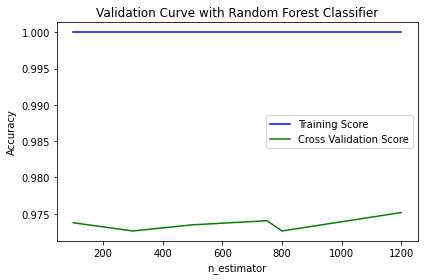

In [69]:
mean_train_scoreNum = np.mean(train_scoreNum, axis = 1) 
std_train_scoreNum = np.std(train_scoreNum, axis = 1) 
   
mean_test_scoreNum = np.mean(test_scoreNum, axis = 1) 
std_test_scoreNum = np.std(test_scoreNum, axis = 1) 

plt.plot(parameter_range, mean_train_scoreNum,  
     label = "Training Score", color = 'b') 
plt.plot(parameter_range, mean_test_scoreNum, 
   label = "Cross Validation Score", color = 'g') 
  
# Creating the plot 
plt.title("Validation Curve with Random Forest Classifier") 
plt.xlabel("n_estimator") 
plt.ylabel("Accuracy") 
plt.tight_layout() 
plt.legend(loc = 'best') 
plt.show()

**min_samples_leaf**

In [80]:
parameter_range = [1,2,3,4,5,6,7,8,9,10]
train_scoreNum, test_scoreNum = validation_curve( rfc, X = X_train, y = y_train, param_name = 'min_samples_leaf', param_range = parameter_range, cv = 3)

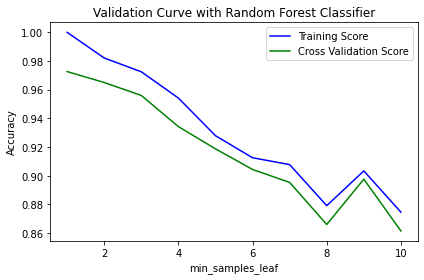

In [81]:
mean_train_scoreNum = np.mean(train_scoreNum, axis = 1) 
std_train_scoreNum = np.std(train_scoreNum, axis = 1) 
   
mean_test_scoreNum = np.mean(test_scoreNum, axis = 1) 
std_test_scoreNum = np.std(test_scoreNum, axis = 1) 

plt.plot(parameter_range, mean_train_scoreNum,  
     label = "Training Score", color = 'b') 
plt.plot(parameter_range, mean_test_scoreNum, 
   label = "Cross Validation Score", color = 'g') 
  
# Creating the plot 
plt.title("Validation Curve with Random Forest Classifier") 
plt.xlabel("min_samples_leaf") 
plt.ylabel("Accuracy") 
plt.tight_layout() 
plt.legend(loc = 'best') 
plt.show()

**min_samples_split**

In [83]:
parameter_range = [2,3,4,5,6,7,8,9,10]
train_scoreNum, test_scoreNum = validation_curve( rfc, X = X_train, y = y_train, param_name = 'min_samples_split', param_range = parameter_range, cv = 3)

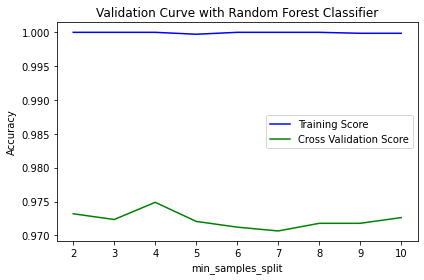

In [84]:
mean_train_scoreNum = np.mean(train_scoreNum, axis = 1) 
std_train_scoreNum = np.std(train_scoreNum, axis = 1) 
   
mean_test_scoreNum = np.mean(test_scoreNum, axis = 1) 
std_test_scoreNum = np.std(test_scoreNum, axis = 1) 

plt.plot(parameter_range, mean_train_scoreNum,  
     label = "Training Score", color = 'b') 
plt.plot(parameter_range, mean_test_scoreNum, 
   label = "Cross Validation Score", color = 'g') 
  
# Creating the plot 
plt.title("Validation Curve with Random Forest Classifier") 
plt.xlabel("min_samples_split") 
plt.ylabel("Accuracy") 
plt.tight_layout() 
plt.legend(loc = 'best') 
plt.show()

**max_features**

In [85]:
parameter_range = ['auto', 'sqrt']
train_scoreNum, test_scoreNum = validation_curve( rfc, X = X_train, y = y_train, param_name = 'max_features', param_range = parameter_range, cv = 3)

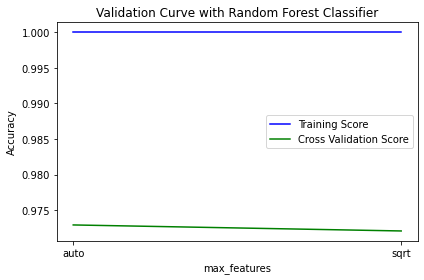

In [87]:
mean_train_scoreNum = np.mean(train_scoreNum, axis = 1) 
std_train_scoreNum = np.std(train_scoreNum, axis = 1) 
   
mean_test_scoreNum = np.mean(test_scoreNum, axis = 1) 
std_test_scoreNum = np.std(test_scoreNum, axis = 1) 

plt.plot(parameter_range, mean_train_scoreNum,  
     label = "Training Score", color = 'b') 
plt.plot(parameter_range, mean_test_scoreNum, 
   label = "Cross Validation Score", color = 'g') 
  
# Creating the plot 
plt.title("Validation Curve with Random Forest Classifier") 
plt.xlabel("max_features") 
plt.ylabel("Accuracy") 
plt.tight_layout() 
plt.legend(loc = 'best') 
plt.show()

**max_depth**

In [88]:
parameter_range = [100, 200, 300, 400, 500, 600]
train_scoreNum, test_scoreNum = validation_curve( rfc, X = X_train, y = y_train, param_name = 'max_depth', param_range = parameter_range, cv = 3)

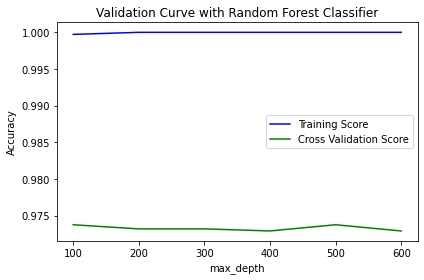

In [89]:
mean_train_scoreNum = np.mean(train_scoreNum, axis = 1) 
std_train_scoreNum = np.std(train_scoreNum, axis = 1) 
   
mean_test_scoreNum = np.mean(test_scoreNum, axis = 1) 
std_test_scoreNum = np.std(test_scoreNum, axis = 1) 

plt.plot(parameter_range, mean_train_scoreNum,  
     label = "Training Score", color = 'b') 
plt.plot(parameter_range, mean_test_scoreNum, 
   label = "Cross Validation Score", color = 'g') 
  
# Creating the plot 
plt.title("Validation Curve with Random Forest Classifier") 
plt.xlabel("max_depth") 
plt.ylabel("Accuracy") 
plt.tight_layout() 
plt.legend(loc = 'best') 
plt.show()

**max_leaf_nodes**

In [90]:
parameter_range = [100, 200, 300, 400, 500, 600]
train_scoreNum, test_scoreNum = validation_curve( rfc, X = X_train, y = y_train, param_name = 'max_leaf_nodes', param_range = parameter_range, cv = 3)

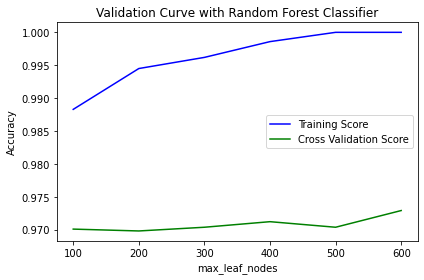

In [91]:
mean_train_scoreNum = np.mean(train_scoreNum, axis = 1) 
std_train_scoreNum = np.std(train_scoreNum, axis = 1) 
   
mean_test_scoreNum = np.mean(test_scoreNum, axis = 1) 
std_test_scoreNum = np.std(test_scoreNum, axis = 1) 

plt.plot(parameter_range, mean_train_scoreNum,  
     label = "Training Score", color = 'b') 
plt.plot(parameter_range, mean_test_scoreNum, 
   label = "Cross Validation Score", color = 'g') 
  
# Creating the plot 
plt.title("Validation Curve with Random Forest Classifier") 
plt.xlabel("max_leaf_nodes") 
plt.ylabel("Accuracy") 
plt.tight_layout() 
plt.legend(loc = 'best') 
plt.show()

**min_samples_leaf**

In [95]:
parameter_range = [1, 2, 3, 4, 5, 6, 7]
train_scoreNum, test_scoreNum = validation_curve( rfc, X = X_train, y = y_train, param_name = 'min_samples_leaf', param_range = parameter_range, cv = 3)

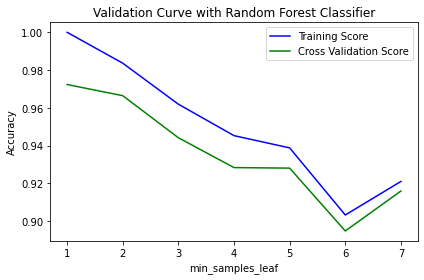

In [96]:
mean_train_scoreNum = np.mean(train_scoreNum, axis = 1) 
std_train_scoreNum = np.std(train_scoreNum, axis = 1) 
   
mean_test_scoreNum = np.mean(test_scoreNum, axis = 1) 
std_test_scoreNum = np.std(test_scoreNum, axis = 1) 

plt.plot(parameter_range, mean_train_scoreNum,  
     label = "Training Score", color = 'b') 
plt.plot(parameter_range, mean_test_scoreNum, 
   label = "Cross Validation Score", color = 'g') 
  
# Creating the plot 
plt.title("Validation Curve with Random Forest Classifier") 
plt.xlabel("min_samples_leaf") 
plt.ylabel("Accuracy") 
plt.tight_layout() 
plt.legend(loc = 'best') 
plt.show()

# **Using RandomizedSearchCV for optimization**

Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

In [70]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [ int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 4, 5, 10]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 4, 5, 10], 'bootstrap': [True, False]}


In [71]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [73]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 40.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [74]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 110,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1400}

# **Re-training the model using optimized parameters.**

In [75]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('rfcRandom', RandomForestClassifier(bootstrap = False,
 max_depth = 110,
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split = 5,
 n_estimators = 1400))])

rfcRandom = pipe.fit(x_train, y_train)
prediction = rfcRandom.predict(x_test)
accuracy_score(y_test, prediction)

0.9782894736842105

# **Overall Model Performance**

In [ ]:
evaluate(rfcRandom, x_test, y_test)

Model Performance
Average Error: 0.0217 degrees.
Accuracy = 0.98%.
Exact Accuracy Value: 


0.9782894736842105